# ML 1 - Pattern Recognition Preliminaries: Feature Extraction

* Name: Gelli Mae Gloria
* Date: December 14, 2020
* Student Number: 2015-06435

### Preliminaries
Import all important packages from Python: 
* **Pandas**: Reading and loading the file; make dataframes 
* **Numpy**: For multidimensional array and operations on arrays
* **Matplotlib/Seaborn**: For our visualizations (2D and 3D)

In [2]:
# Import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Create dataframe for each fruit class

mango = pd.read_excel('new_features.xlsx', sheet_name = 'Class 1 - Mango')
orange = pd.read_excel('new_features.xlsx', sheet_name = 'Class 2 - Orange')
banana = pd.read_excel('new_features.xlsx', sheet_name = 'Class 3 - Banana')
mango = pd.DataFrame(mango)
orange = pd.DataFrame(orange)
banana = pd.DataFrame(banana)
orange.head()

,Image,R,G,B,StDev,Median,AR,Skew,Round
0,1,216,64,25,29.606,132,1.049,0.752,0.953
1,2,241,111,14,28.003,133,1.032,0.523,0.969
2,3,228,121,21,33.213,138,1.012,0.624,0.988
3,4,238,145,23,18.029,124,1.065,1.217,0.939
4,5,252,130,24,27.140,138,1.151,1.099,0.869


### Hue

* If Red is max, then Hue = (G-B)/(max-min)
* If Green is max, then Hue = 2.0 + (B-R)/(max-min)
* If Blue is max, then Hue = 4.0 + (R-G)/(max-min)

In [4]:
def hue(R,G,B):
    vals = [R, G, B]
    max_vals = max(vals)
    min_vals = min(vals)
    
    if max_vals == R:
        hue = 60 * (G-B)/(max_vals - min_vals)
    elif max_vals == G:
        hue = 60 * (2+(B-R)/(max_vals - min_vals))
    else:
        hue = 60 * (4+(R-G)/(max_vals - min_vals))
    
    return hue

In [5]:
mango['Hue'] = mango.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
mango["Class"] = 'Mango'
orange['Hue'] = orange.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
orange["Class"] = 'Orange'
banana['Hue'] = banana.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
banana["Class"] = 'Banana'

mango.head()

,Image,R,G,B,StDev,Median,AR,Skew,Round,Hue,Class
0,1,215,210,177,35.793,183,1.688,-0.679,0.593,52.105263,Mango
1,2,248,190,73,14.205,175,1.727,-0.416,0.579,40.114286,Mango
2,3,246,225,81,20.652,158,1.729,-0.553,0.578,52.363636,Mango
3,4,220,155,93,30.002,110,1.446,0.831,0.692,29.291339,Mango
4,5,249,209,75,19.470,171,1.553,-0.438,0.644,46.206897,Mango


### Visualizations

Let's check if clustering is present when the feature points are plotted in 2D or 3D space 

In [6]:
data = pd.concat([mango, orange, banana], ignore_index = True, sort = False)
data = data.drop(columns = ['Image', 'R', 'G', 'B'])
data['Hue_norm'] = data['Hue']/max(data['Hue'])
data['Median'] = data['Median']/max(data['Median'])
data['Skew'] = data['Skew']/max(data['Skew'])
data['AR'] = data['AR']/max(data['AR'])
data.tail()

,StDev,Median,AR,Skew,Round,Hue,Class,Hue_norm
49,20.602,0.765000,0.741537,0.202809,0.362,46.968326,Banana,0.843021
50,15.302,0.890000,0.775658,0.180091,0.346,46.256983,Banana,0.830254
51,20.403,0.895000,0.634068,-0.155721,0.424,48.000000,Banana,0.861538
52,19.566,-0.002875,0.548898,-0.237505,0.490,45.742574,Banana,0.821021
53,16.918,0.795000,0.670339,0.010326,0.401,46.175115,Banana,0.828784


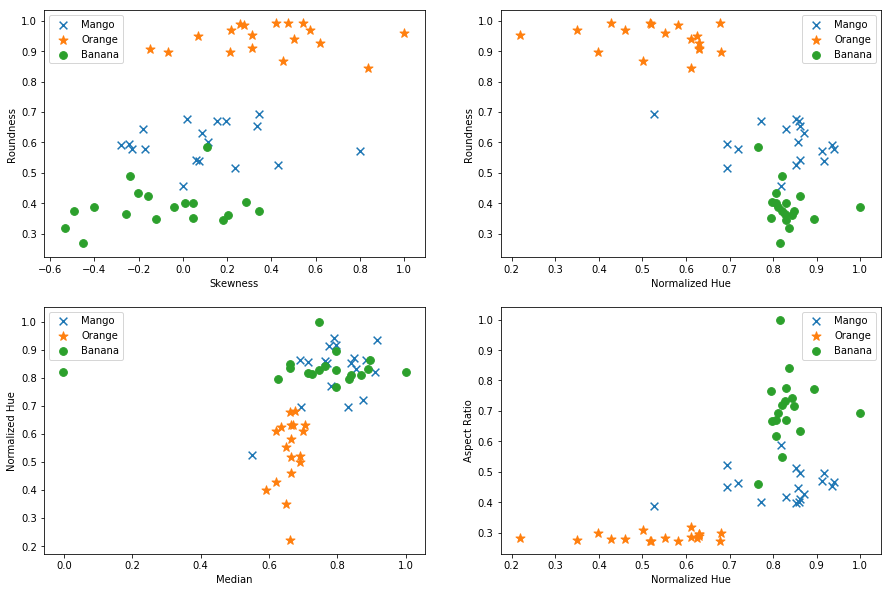

In [55]:
data['species']=pd.Categorical(data['Class'])
my_color=data['species'].cat.codes

v = data['Median']
w = data['AR']
x = data['Skew']
y = data['Round']
z = data['Hue_norm']

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].scatter(x[my_color == 1], y[my_color == 1] , s = 60, marker = 'x', label = 'Mango')
ax[0,0].scatter(x[my_color == 2], y[my_color == 2] , s = 90, marker = '*', label = 'Orange')
ax[0,0].scatter(x[my_color == 0], y[my_color == 0] , s = 60, marker = 'o', label = 'Banana')
ax[0,0].legend()
ax[0,0].set_xlabel('Skewness')
ax[0,0].set_ylabel('Roundness')

ax[0,1].scatter(z[my_color == 1], y[my_color == 1] , s = 60, marker = 'x', label = 'Mango')
ax[0,1].scatter(z[my_color == 2], y[my_color == 2] , s = 90, marker = '*', label = 'Orange')
ax[0,1].scatter(z[my_color == 0], y[my_color == 0] , s = 60, marker = 'o', label = 'Banana')
ax[0,1].legend()
ax[0,1].set_xlabel('Normalized Hue')
ax[0,1].set_ylabel('Roundness')

ax[1,0].scatter(v[my_color == 1], z[my_color == 1] , s = 60, marker = 'x', label = 'Mango')
ax[1,0].scatter(v[my_color == 2], z[my_color == 2] , s = 90, marker = '*', label = 'Orange')
ax[1,0].scatter(v[my_color == 0], z[my_color == 0] , s = 60, marker = 'o', label = 'Banana')
ax[1,0].legend()
ax[1,0].set_ylabel('Normalized Hue')
ax[1,0].set_xlabel('Median')

ax[1,1].scatter(z[my_color == 1], w[my_color == 1] , s = 60, marker = 'x', label = 'Mango')
ax[1,1].scatter(z[my_color == 2], w[my_color == 2] , s = 90, marker = '*', label = 'Orange')
ax[1,1].scatter(z[my_color == 0], w[my_color == 0] , s = 60, marker = 'o', label = 'Banana')
ax[1,1].legend()
ax[1,1].set_ylabel('Aspect Ratio')
ax[1,1].set_xlabel('Normalized Hue')

plt.savefig('2D.png')

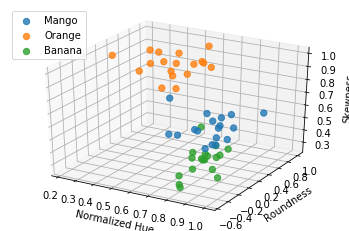

In [54]:
data['species']=pd.Categorical(data['Class'])
my_color=data['species'].cat.codes


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z[my_color == 1], x[my_color == 1], y[my_color == 1], s=40, label = 'Mango', alpha = 0.8)
ax.scatter(z[my_color == 2], x[my_color == 2], y[my_color == 2], s=40, label = 'Orange', alpha = 0.8)
ax.scatter(z[my_color == 0], x[my_color == 0], y[my_color == 0], s=40, label = 'Banana', alpha = 0.8)
ax.legend(loc = 2)
ax.set_xlabel('Normalized Hue')
ax.set_ylabel('Roundness')
ax.set_zlabel('Skewness')

plt.savefig('3D.png')